In [167]:
import pandas as pd
import numpy as np
import os
import sklearn.cross_validation as cv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

data_salaries = "raw_data/Salaries.csv"
data_batting = "raw_data/Batting.csv"
data_pitching = "raw_data/Pitching.csv"
data_halloffame = "raw_data/HallOfFame.csv"
data_fielding = "raw_data/Fielding.csv"

salaries = pd.read_csv(data_salaries)
pitching = pd.read_csv(data_pitching)
halloffame = pd.read_csv(data_halloffame)
batting = pd.read_csv(data_batting)

rename_pitching = {"G": "games", "W": "wins", "L": "losses", "H": "hits",
              "WP": "wild_pitches", "R": "runs_allowed", "SO": "strikeouts",
              "SHO": "shutouts", "SV": "saves", "IPouts": "outs_pitched",
              "BB": "walks", "BFP": "batters_faced"}
rename_batting = {"G": "b_games","AB": "at_bat","R": "runs_allowed", "H": "hits",
                  "2B": "Double", "3B": "Triple", "HR": "home_runs", "BB": "walks", 
                  "SO": "strikeouts"}

pitching.rename(columns=rename_pitching, inplace=True)
batting.rename(columns=rename_batting, inplace=True)

In [168]:
print("Score: {0}".format(regressor.score(Xvals, yvals)))

Score: 0.7297115056758972


In [169]:
total_salaries = salaries.groupby(["playerID"])["salary"].sum()
total_pitching = pitching.groupby(["playerID"])[["games", "wins", "losses",
                                                 "hits", "wild_pitches",
                                                 "runs_allowed",
                                                 "strikeouts", "outs_pitched",
                                                 "shutouts", "saves",
                                                "walks", "batters_faced"]].sum()
total_batting = batting.groupby(["playerID"])[["at_bat", "Double", "Triple", "home_runs"]].sum()
# total_halloffame = halloffame.groupby(["playerID"])["playerID"].

all_stats = pd.concat((total_batting, total_pitching, total_salaries), axis=1)
all_stats = all_stats[(all_stats.games > 0) & (all_stats.salary > 0)]
all_stats_clean = all_stats.dropna()
# print(all_stats)

In [180]:
N_folds = 14
kfolds = cv.KFold(len(all_stats_clean), n_folds=N_folds)

regressor = linear_model.LinearRegression()
valid_data = ["strikeouts", "runs_allowed", "saves", "hits",
             "shutouts", "wins", "losses", "outs_pitched",
             "walks", "batters_faced", "at_bat", "Double", "Triple", "home_runs"]
Xvals = np.array(all_stats_clean[valid_data])
yvals = np.array(all_stats_clean.salary)

coeffs, intercepts = [], []

for train_index, test_index in kfolds:
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    regressor.fit(X_train, y_train)
    coeffs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

coeffs = np.array(coeffs).mean(axis=0) #averages each column
intercept = np.array(intercepts).mean(axis=0)

regressor.coef_ = coeffs
regressor.intercept_ = intercept

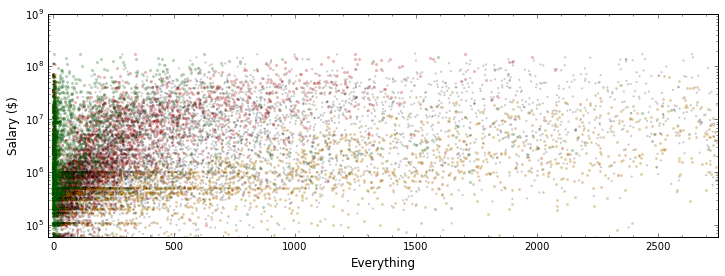

In [179]:
plt.figure(figsize=(12, 4))
plt.scatter(all_stats_clean.strikeouts, all_stats_clean.salary, edgecolor="None", s=5, c='k', alpha=0.2)
plt.scatter(all_stats_clean.runs_allowed, all_stats_clean.salary, edgecolor="Red", s=5, c='k', alpha=0.2)
plt.scatter(all_stats_clean.hits, all_stats_clean.salary, edgecolor="None", s=5, c='k', alpha=0.2)
plt.scatter(all_stats_clean.outs_pitched, all_stats_clean.salary, edgecolor="None", s=5, c='k', alpha=0.2)
plt.scatter(all_stats_clean.walks, all_stats_clean.salary, edgecolor="None", s=5, c='k', alpha=0.2)
plt.scatter(all_stats_clean.batters_faced, all_stats_clean.salary, edgecolor="Orange", s=5, c='k', alpha=0.2)
plt.scatter(all_stats_clean.at_bat, all_stats_clean.salary, edgecolor="Green", s=5, c='k', alpha=0.2)

# plt.scatter(Xvals[:, 1], regressor.predict(Xvals), color='r')

plt.yscale("log")
plt.xlabel("Everything", fontsize=12); plt.ylabel("Salary ($)", fontsize=12)
plt.minorticks_on()
plt.xlim(-20, 2750)
plt.ylim(60000)
plt.show()

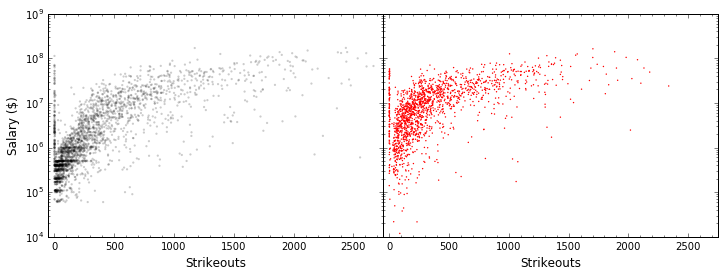

In [172]:
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(wspace=0)
ax = plt.subplot(121)
ax.scatter(all_stats_clean.strikeouts, all_stats_clean.salary, edgecolor="None",
            s=5, c='k', alpha=0.2)
ax.set_yscale("log")
ax.set_xlabel("Strikeouts", fontsize=12); ax.set_ylabel("Salary ($)", fontsize=12)
ax.set_xlim(-50, 2750); ax.minorticks_on()

ax = plt.subplot(122)
ax.scatter(Xvals[:, 1], regressor.predict(Xvals), edgecolor="None",
            s=2, c='r')
ax.set_xlabel("Strikeouts", fontsize=12)
ax.set_ylim(1E4, 1E9)
ax.set_yscale("log"); ax.set_yticklabels([])
ax.set_xlim(-50, 2750); ax.minorticks_on()

plt.show()